In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.metrics import classification_report_imbalanced
import pickle

In [19]:
new_df = pd.read_csv("Resources/ML_player_dataset.csv")

In [20]:
new_df.head()

,season,name,team,position,games_played,corsi_percentage,fenwick_percentage,goals,points,penalty_minutes,hits,takeaways,giveaways,games_missed,points_per_game,PPGP,PPGN
0,2013,Roman Josi,NSH,D,72,0.49,0.51,13,40,18,32,22,34,10,0.56,0.38,0.68
1,2013,Jonathan Huberdeau,FLA,L,69,0.56,0.54,9,28,37,73,32,21,11,0.41,0.65,0.68
2,2013,Tomas Kopecky,FLA,R,49,0.49,0.49,4,12,18,31,17,10,24,0.24,0.57,0.12
3,2013,Alexander Semin,CAR,R,65,0.60,0.59,22,42,42,22,49,56,12,0.65,1.00,0.33
4,2013,Loui Eriksson,BOS,L,61,0.59,0.58,10,37,6,12,31,17,15,0.61,0.60,0.58


In [21]:
columns = [
    "name", "team", "position", "games_missed", "points_per_game", "PPGP", "PPGN"
]

In [22]:
SuperML_df = new_df.loc[:, columns].copy()

In [23]:
SuperML_df.head()

,name,team,position,games_missed,points_per_game,PPGP,PPGN
0,Roman Josi,NSH,D,10,0.56,0.38,0.68
1,Jonathan Huberdeau,FLA,L,11,0.41,0.65,0.68
2,Tomas Kopecky,FLA,R,24,0.24,0.57,0.12
3,Alexander Semin,CAR,R,12,0.65,1.00,0.33
4,Loui Eriksson,BOS,L,15,0.61,0.60,0.58


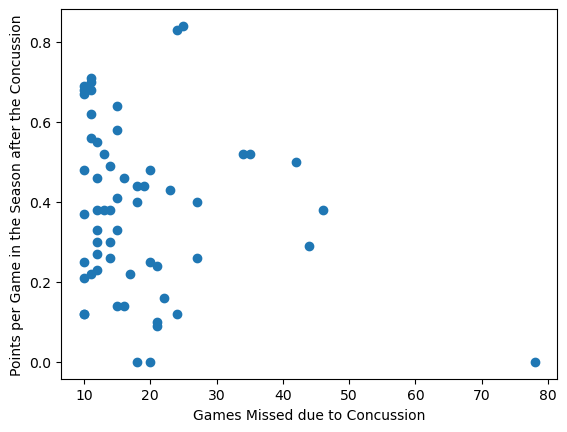

In [24]:
plt.scatter(SuperML_df.games_missed, SuperML_df.PPGN)
plt.xlabel('Games Missed due to Concussion')
plt.ylabel('Points per Game in the Season after the Concussion')
plt.show()

In [25]:
X = SuperML_df.games_missed.values.reshape(-1,1)

In [26]:
X[:5]

array([[10],
       [11],
       [24],
       [12],
       [15]], dtype=int64)

In [27]:
X.shape

(59, 1)

In [28]:
pickle.dump(model, open('model.pkl', 'wb'))

In [29]:
y = SuperML_df['PPGN']
# Fit the data to Linear Regression Model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [30]:
y_pred = model.predict(X)
print(y_pred.shape)

(59,)


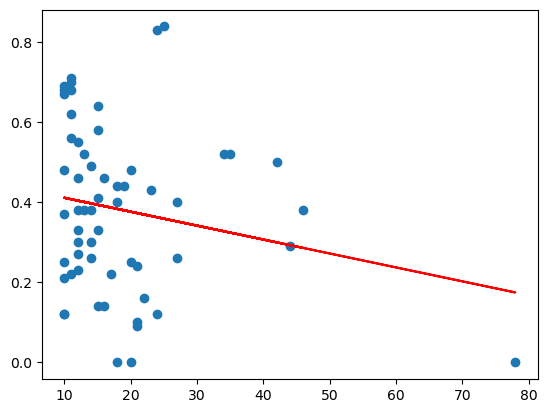

In [31]:
# Scatter plot with line of best fit.
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red')
plt.show()

In [32]:
print(model.coef_)
print(model.intercept_)

[-0.0034805]
0.4465116929400136


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, stratify=y)
X_train.shape

Balanced Random Forest Classifier

In [ ]:
# Resampling the training data with the BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brfc_model.fit(X_train, y_train)

In [ ]:
# Calculating the balanced accuracy score
y_pred = brfc_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Displaying Confusion Matrix
confusion_matrix(y_test, y_pred)

Easy Ensemble AdaBoost Classifier

In [ ]:
# Training the EasyEnsemblerClassifier
eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec_model.fit(X_train, y_train)

In [ ]:
# Calculating the balanced accuracy score
y_pred = eec_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9583333333333333

In [ ]:
# Displaying the confusion matrix
confusion_matrix(y_test, y_pred)

array([[11,  1],
       [ 0, 13]], dtype=int64)